In [1]:
#Building model and training
import pandas as pd
import numpy as np
%pip install matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,Convolution2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# %pip install --upgrade numpy
# %pip install --upgrade scikit-learn

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [5]:
train = pd.read_csv('archive/sign_mnist_train.csv', header=0)
test = pd.read_csv('archive/sign_mnist_test.csv',header=0)

In [6]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

In [7]:
X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])
X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
X_train[0]

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

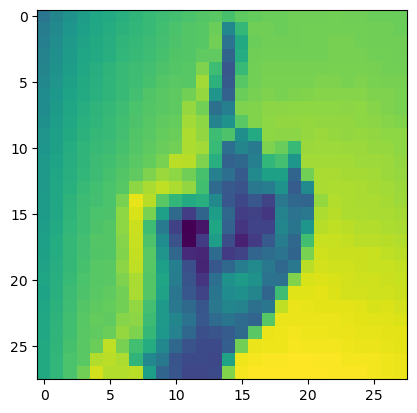

In [8]:
plt.imshow(X_train[0])

In [9]:
plt.show()

In [11]:
print('Training examples:',X_train.shape[0])
print('Test examples:',X_test.shape[0])
print('X_train shape"',X_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',X_test.shape)
print('y_test shape"',y_test.shape)

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 26)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 26)


In [12]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [13]:
#building the cnn model
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

2023-12-07 01:35:14.002988: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-07 01:35:14.003054: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-07 01:35:14.003068: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-07 01:35:14.003654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-07 01:35:14.004806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0

In [15]:
#Training
model.fit(X_train, y_train, batch_size = 50, epochs = 3)
y_pred = model.predict(X_test)
#Testing
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

Epoch 1/3
550/550 [==============================] - 48s 88ms/step - loss: 32.0907 - accuracy: 0.7050
Epoch 2/3
550/550 [==============================] - 47s 85ms/step - loss: 29.0628 - accuracy: 0.8505
Epoch 3/3
225/225 [==============================] - 1s 5ms/step


array([ 6,  5, 10, ...,  2,  4,  2])

In [16]:
y_test = np.array(test['label'].values)
y_test


array([ 6,  5, 10, ...,  2,  4,  2])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8951477969882878